In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import load
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [ ]:
df = pd.read_csv("drive/MyDrive/archive/NTU_Phishing.csv")

In [ ]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,2,0,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,0,1,28,1,0,0,0,0,...,0,0,0,0,-1,-1,0,0,0,0
2,3,2,1,1,35,0,0,0,0,0,...,0,0,0,1,0,-1,0,-1,0,0
3,4,2,1,1,75,10,0,0,0,0,...,1,0,0,1,-1,-1,0,-1,-1,0
4,5,1,0,0,26,0,0,0,0,0,...,1,0,0,0,-1,-1,0,-1,1,0


In [ ]:
df.dtypes

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [ ]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.000000,...,100.000000,100.00,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2.130000,0.460000,1.290000,47.850000,1.690000,0.350000,0.0,0.0,0.080000,...,0.370000,0.01,0.020000,0.900000,-0.12000,0.160000,0.550000,-0.180000,0.120000,0.500000
std,29.011492,1.404574,0.716614,1.281532,27.285018,2.592511,0.687184,0.0,0.0,0.338744,...,0.485237,0.10,0.140705,0.333333,0.80754,0.928994,0.657129,0.770412,0.913203,0.502519
min,1.000000,1.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,25.750000,1.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,1.000000,-1.00000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
50%,50.500000,2.000000,0.000000,1.000000,44.000000,1.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.00,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.500000
75%,75.250000,2.000000,1.000000,2.000000,60.500000,2.000000,1.000000,0.0,0.0,0.000000,...,1.000000,0.00,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000
max,100.000000,7.000000,3.000000,5.000000,212.000000,14.000000,3.000000,0.0,0.0,2.000000,...,1.000000,1.00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(100, 50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  100 non-null    int64  
 1   NumDots                             100 non-null    int64  
 2   SubdomainLevel                      100 non-null    int64  
 3   PathLevel                           100 non-null    int64  
 4   UrlLength                           100 non-null    int64  
 5   NumDash                             100 non-null    int64  
 6   NumDashInHostname                   100 non-null    int64  
 7   AtSymbol                            100 non-null    int64  
 8   TildeSymbol                         100 non-null    int64  
 9   NumUnderscore                       100 non-null    int64  
 10  NumPercent                          100 non-null    int64  
 11  NumQueryComponents                  100 non-nu

In [ ]:
class_counts = df['CLASS_LABEL'].value_counts()
print(class_counts)

CLASS_LABEL
0    50
1    50
Name: count, dtype: int64


Text(0, 0.5, 'Count')

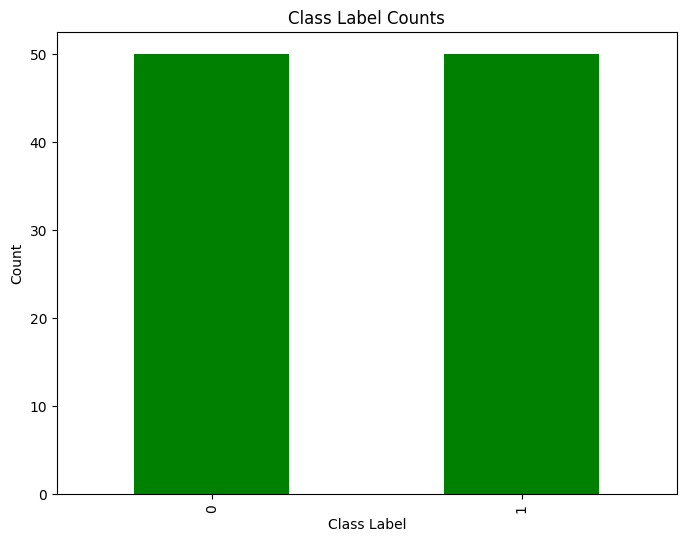

In [ ]:
plt.figure(figsize=(8, 6)) #Tạo một hình vẽ mới với kích thước 8x6 inches
class_counts.plot(kind='bar', color='green') #Vẽ biểu đồ cột của số lượng mẫu trong mỗi nhóm (giá trị) của cột "CLASS_LABEL"
plt.title('Class Label Counts') #đặt tên cho biểu đồ
plt.xlabel('Class Label') #đặt nhãn cho trục x
plt.ylabel('Count') #đặt nhãn cho trục y

In [ ]:
X = df.drop(columns=['CLASS_LABEL', 'id']) #Tạo một DataFrame mới là X để loại bỏ các cột không cần thiết (class_label và id)
y = df['CLASS_LABEL'] #Tạo một y chứa cột 'CLASS_LABEL', là biến mục tiêu cần dự đoán.
#X bây giờ chứa dữ liệu đầu vào sau khi loại bỏ cột không cần thiết.
scaler = StandardScaler() #Tạo một đối tượng StandardScaler để chuẩn hóa dữ liệu.
X = scaler.fit_transform(X) #Chuẩn hóa dữ liệu đầu vào X (đảm bảo rằng các đặc trưng sẽ có giá trị trung bình gần bằng 0 và độ lệch chuẩn gần bằng 1)

lớp RandomForestClassifier từ thư viện scikit-learn

In [ ]:
model = load("drive/MyDrive/archive/RF_model.joblib")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]
Accuracy: 89.00%
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        50
           1       1.00      0.78      0.88        50

    accuracy                           0.89       100
   macro avg       0.91      0.89      0.89       100
weighted avg       0.91      0.89      0.89       100

Confusion Matrix:


<Axes: >

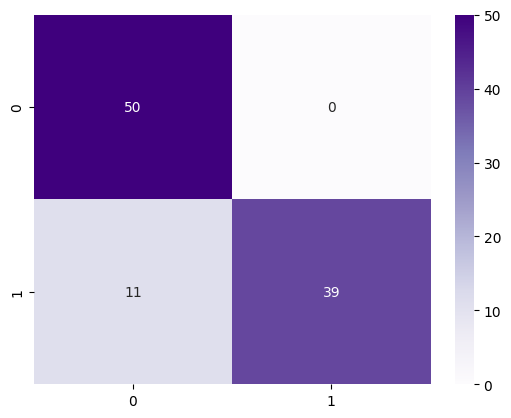

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
predictions = model.predict(X)
print(predictions)
# Dự đoán và đánh giá mô hình
accuracy = accuracy_score(y, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y, predictions))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y, predictions)
sns.heatmap(conf_matrix, annot=True, cmap='Purples')

lớp DecisionTreeClassifier từ thư viện scikit-learn.

In [ ]:
model = load("drive/MyDrive/archive/DT_model.joblib")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1]
Accuracy: 91.00%
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       1.00      0.82      0.90        50

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



<Axes: >

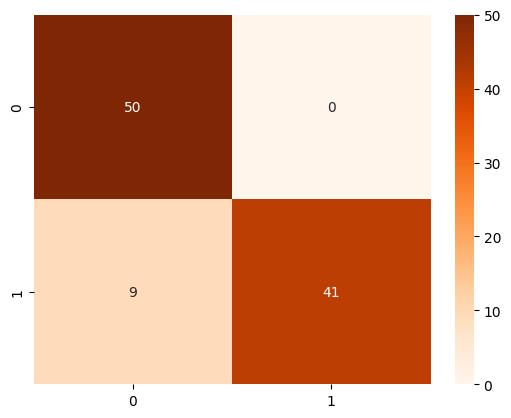

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
X_testDT = model.predict(X)
print(X_testDT)
score = accuracy_score(y, X_testDT)
print(f'Accuracy: {score * 100:.2f}%')
print(classification_report(y, X_testDT))
conf_matrix = confusion_matrix(y, X_testDT)
sns.heatmap(conf_matrix, annot=True, cmap='Oranges')

Xgboots

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1]
Accuracy: 87.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        50
           1       0.97      0.76      0.85        50

    accuracy                           0.87       100
   macro avg       0.89      0.87      0.87       100
weighted avg       0.89      0.87      0.87       100

Confusion Matrix:


<Axes: >

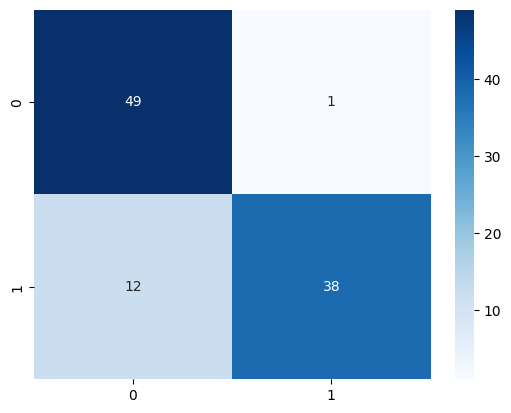

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
model = load("drive/MyDrive/archive/Xgb_model.joblib")
X_test_xgb = model.predict(X)
print(X_test_xgb)
accuracyxgb = accuracy_score(y, X_test_xgb)
print(f'Accuracy: {accuracyxgb * 100:.2f}%')
report1 = classification_report(y, X_test_xgb)
print("Classification Report:")
print(report1)
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y, X_test_xgb)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

In kết quả mô hình

Accuracy (Random Forest): 89.00%
Accuracy (Decision Tree): 91.00%
Accuracy (XGBoost): 87.00%


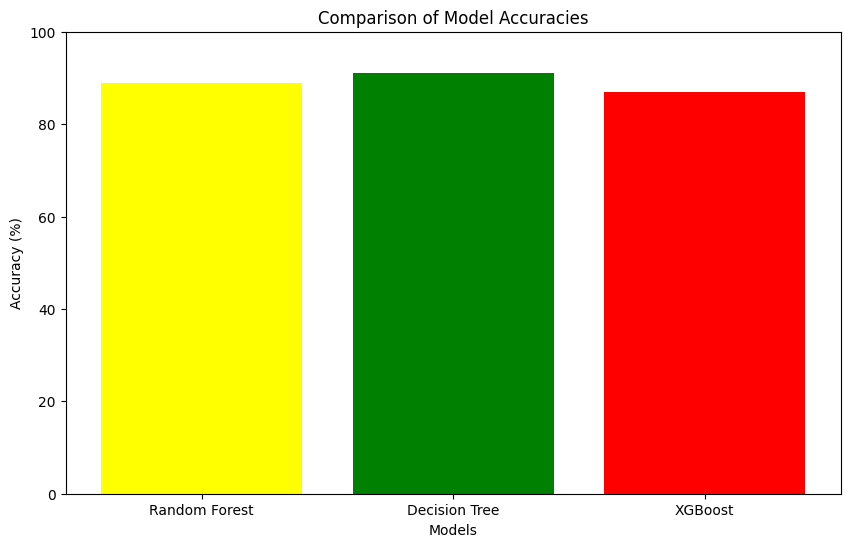

In [ ]:
# Độ chính xác của các mô hình
accuracies = [accuracy * 100, score * 100, accuracyxgb * 100]
models = ['Random Forest', 'Decision Tree', 'XGBoost']

# In ra độ chính xác của các mô hình
print(f'Accuracy (Random Forest): {accuracies[0]:.2f}%')
print(f'Accuracy (Decision Tree): {accuracies[1]:.2f}%')
print(f'Accuracy (XGBoost): {accuracies[2]:.2f}%')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['yellow', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)  # Đặt giới hạn trục y từ 0 đến 100%
plt.show()